<a href="https://colab.research.google.com/github/IvanSalinas2000/Preprocesamiento-y-clasificacion-de-datos/blob/main/Tarea4/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('/content/galletas.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertir a RGB para mostrar correctamente



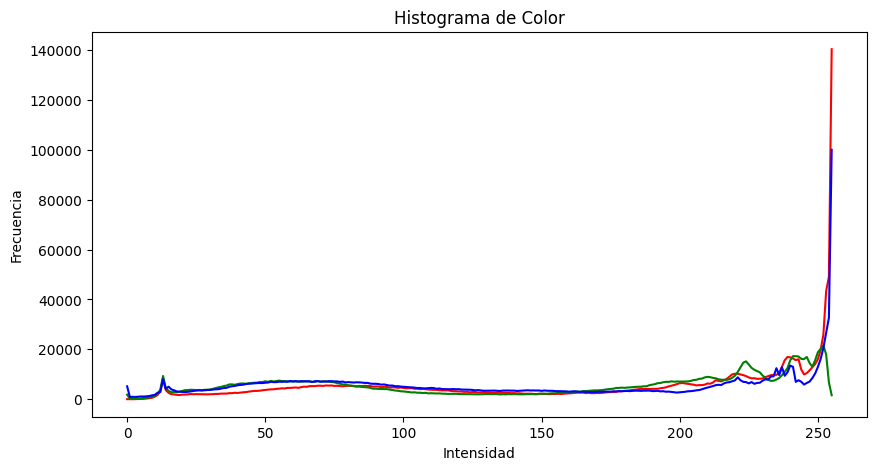

In [2]:
# 1️⃣ **Histograma de color (RGB)**
def mostrar_histograma(imagen):
    colores = ('r', 'g', 'b')  # Colores para los canales
    canales = cv2.split(imagen)

    plt.figure(figsize=(10,5))
    for canal, color in zip(canales, colores):
        hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Histograma de Color")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.show()

mostrar_histograma(imagen_rgb)



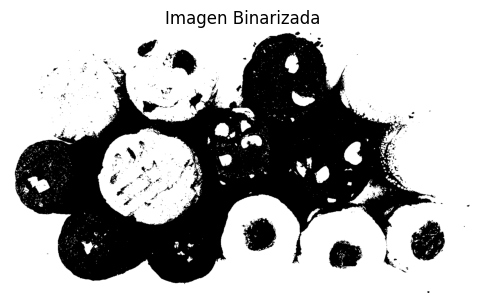

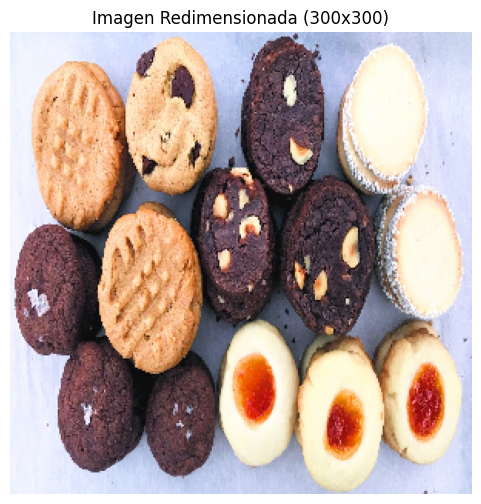

In [3]:
# 2️⃣ **Binarización de la imagen**
grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(grises, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,6))
plt.imshow(binaria, cmap='gray')
plt.title("Imagen Binarizada")
plt.axis("off")
plt.show()

# 3️⃣ **Redimensionar la imagen (ejemplo: 300x300)**
imagen_redimensionada = cv2.resize(imagen_rgb, (300, 300))

plt.figure(figsize=(6,6))
plt.imshow(imagen_redimensionada)
plt.title("Imagen Redimensionada (300x300)")
plt.axis("off")
plt.show()



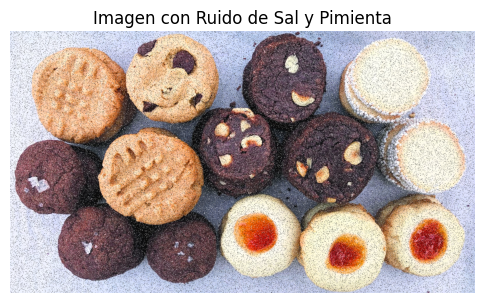

In [4]:
# 4️⃣ **Agregar ruido de sal y pimienta**
def agregar_ruido_sal_pimienta(img, prob=0.02):
    ruido = img.copy()
    num_pixeles = int(prob * img.size)

    # Sal (blanco)
    coords = [np.random.randint(0, i - 1, num_pixeles) for i in img.shape[:2]]
    ruido[coords[0], coords[1], :] = 255

    # Pimienta (negro)
    coords = [np.random.randint(0, i - 1, num_pixeles) for i in img.shape[:2]]
    ruido[coords[0], coords[1], :] = 0

    return ruido

imagen_ruido = agregar_ruido_sal_pimienta(imagen_rgb)

plt.figure(figsize=(6,6))
plt.imshow(imagen_ruido)
plt.title("Imagen con Ruido de Sal y Pimienta")
plt.axis("off")
plt.show()



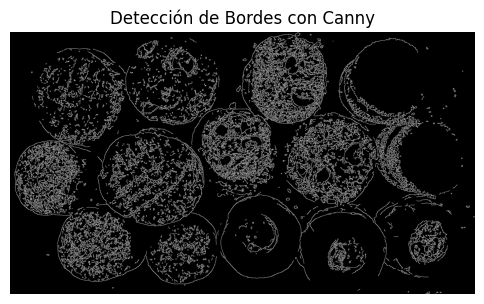

In [5]:
# 5️⃣ **Detección de bordes con Canny**
bordes = cv2.Canny(grises, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(bordes, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis("off")
plt.show()


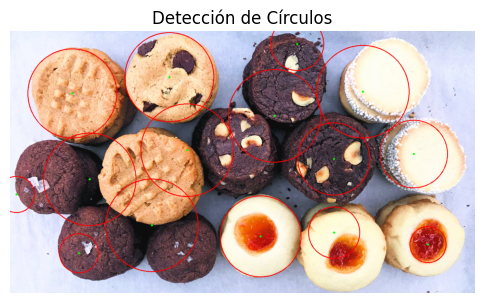

In [14]:

# 6️⃣ **Detección de círculos (objetos circulares)**
# Detección de círculos (objetos circulares)
circulos = cv2.HoughCircles(
    grises, cv2.HOUGH_GRADIENT, dp=1.2, minDist=250,  # Aumenta minDist para evitar círculos cercanos
    param1=150, param2=60,  # Aumenta param2 para hacer la detección más estricta
    minRadius=50, maxRadius=160  # Ajusta los radios para coincidir con el tamaño de las galletas
)


imagen_circulos = imagen_rgb.copy()
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        cv2.circle(imagen_circulos, (i[0], i[1]), i[2], (255, 0, 0), 2)  # Dibujar círculo
        cv2.circle(imagen_circulos, (i[0], i[1]), 2, (0, 255, 0), 3)  # Dibujar centro

plt.figure(figsize=(6,6))
plt.imshow(imagen_circulos)
plt.title("Detección de Círculos")
plt.axis("off")
plt.show()
